# **Market Basket Analysis**

Market basket analysis (MBA) is a business intelligence technique to predict future purchase decisions of the customers. It studies customers’ buying patterns and preferences to predict what they will prefer to purchase along with the existing items in their cart. For example, if 3 out of 5 times a customer purchases egg along with flour and sugar (probably for baking cake) then market basket analysis can predict the possibility of buying egg if it is offered along with these two items. Market basket analysis is described mostly in form of associations for example:

*   If flour is purchased then sugar is also purchased
*   If sugar is purchased then flour is also purchased
*   If both flour and sugar are purchased then egg is purchased 60% of the time.









Here we use the term “antecedent” for IF and “Consequent” for THEN part of the statement. Thus, market basket analysis helps in making decisions regarding placement of goods, marketing communications, inventory maintenance etc.

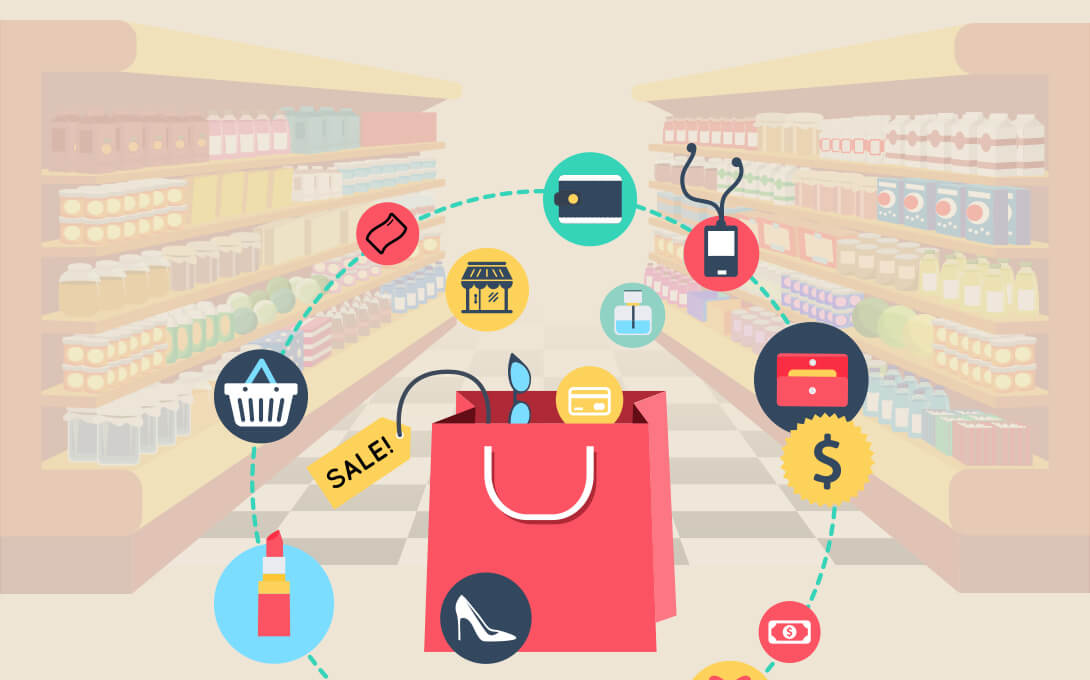

#Importing the required libraries




In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=a5d4acc3416a06590a29fc10fe44dddc6a6a064d73a280a8fc9fdc37f79bc361
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


#Loading the dataset

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation (1).csv


In [ ]:
df=pd.read_csv("Market_Basket_Optimisation.csv",header=None)

#for displaying the top five rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(7501, 20)

In [ ]:
#To find the statistical summary of the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,frozen smoothie,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [ ]:
#to find the number of null values in a each column
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

#Data Preprocessing

For using the Apriori Algorithm, we need the data in the form of list.

In [ ]:
data = []
for i in range(0,7501):
    rows = [str(i) for i in df.iloc[i,:] if str(i)!='nan']
    data.append(rows)
print(data)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

# **Association Rules:** 
Association rules analysis is a technique to uncover how items are associated to each other. 

There are three common ways to measure association:

1.   **Support:** This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.
2.   **Confidence:** This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. 
3.   **Lift:** This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.  



In our case, we will be using Apriori Algorithm to find out the most frequent itemsets.

# Implementing Apriori Algorithm
The algorithm begins by identifying frequent, individual items (items with a frequency greater than or equal to the given support) in the database and continues to extend them to larger, frequent itemsets​.

We are specifying the values of minimum support, minimum confidence, minimum lift and minimum length.

In [ ]:
#Providing min_support, min_confidence, min_lift, and min length of element_set 
association_rules = apriori(data, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)  

association_results will be containing the combination of only those items/products that satisfy the constraints provided(i.e. min_support, etc...)  

In [ ]:
association_results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [ ]:
association_length = len(association_results)
print("The number of itemsets are : {} " .format(association_length))

The number of itemsets are : 24 


# Visualising the Association rules

In [ ]:
#Displaying the itemset and the corresponding values of support, confidence and lift.
for itemset in association_results:
    
    print("item_set: ",itemset[0])
    print("support: ",itemset[1])

    for i in itemset[2]:
      print("Confidence: ", i[2])
      print("lift: ", i[3])
      print("\n-----------------------------------------\n")

item_set:  frozenset({'chicken', 'light cream'})
support:  0.004532728969470737
Confidence:  0.29059829059829057
lift:  4.84395061728395

-----------------------------------------

item_set:  frozenset({'escalope', 'mushroom cream sauce'})
support:  0.005732568990801226
Confidence:  0.3006993006993007
lift:  3.790832696715049

-----------------------------------------

item_set:  frozenset({'pasta', 'escalope'})
support:  0.005865884548726837
Confidence:  0.3728813559322034
lift:  4.700811850163794

-----------------------------------------

item_set:  frozenset({'herb & pepper', 'ground beef'})
support:  0.015997866951073192
Confidence:  0.3234501347708895
lift:  3.2919938411349285

-----------------------------------------

item_set:  frozenset({'tomato sauce', 'ground beef'})
support:  0.005332622317024397
Confidence:  0.3773584905660377
lift:  3.840659481324083

-----------------------------------------

item_set:  frozenset({'whole wheat pasta', 'olive oil'})
support:  0.007998933

In [ ]:
dataset=[]
for itemset in association_results:
    support = itemset[1]
    for rules in itemset[2]:
        antecedent = [i for i in rules[0]][0]    #An antecedent is an item found within the data.
        consequent = [i for i in rules[1]][0]   #A consequent is an item found in combination with the antecedent.
        confidence = rules[2]
        lift = rules[3]
        dataset.append([antecedent,consequent,support,confidence,lift])          

In [ ]:
itemset_dataset = pd.DataFrame(data=dataset,columns = ['Antecedent','Consequent','Support','Confidence','Lift'])
itemset_dataset

,Antecedent,Consequent,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,herb & pepper,ground beef,0.015998,0.323450,3.291994
4,tomato sauce,ground beef,0.005333,0.377358,3.840659
5,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
6,pasta,shrimp,0.005066,0.322034,4.506672
7,chocolate,shrimp,0.005333,0.232558,3.254512
8,chocolate,frozen vegetables,0.005333,0.296296,3.108418
9,cooking oil,spaghetti,0.004799,0.571429,3.281995


The above table shows the items/products that have high association between them.